In [ ]:
#匯入模組
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import math

In [ ]:
t,l,m,k,u_b,u_p = smp.symbols('t l m k mu_b mu_p',real=True)
the, phi = smp.symbols(r'\theta \phi',cls=smp.Function)
#角度
the = the(t)
phi = phi(t)

#角速度
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)

#角加速度
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)


In [ ]:
#命名變數
g=9.80665 #(單位:米/秒^2)
l=0.18   #(單位:公尺)
m=0.08  #(單位:公斤)
k=0.20  #(單位:公尺)
u_b = 1.4043748542 #(單位:安培*公尺^2)
u_p = 4.35534857444  #(單位:安培*公尺^2)
u_0 = 1.25663706212*10**(-6)

In [ ]:
#拉格朗日

#動能
T = 1/2*m*l**2*the_d**2+1/2*m*l**2*smp.sin(the)**2*phi_d**2

#位能
U_g = -m*g*l*smp.cos(the)
U_b = +0.0324*smp.exp(-the/0.05203)*smp.sin(math.pi*(the+4.69227)/0.23256)

#拉格朗日
L = T-U_g+U_b

In [ ]:
#微分、偏微分
LE1 = smp.diff(L,the)-smp.diff(smp.diff(L,the_d),t)
LE1.simplify()
LE2 = smp.diff(L,phi)-smp.diff(smp.diff(L,phi_d),t)
LE2.simplify()

#解微分方程
sols = smp.solve([LE1, LE2],(the_dd,phi_dd),simplify=False,rational=False)

In [ ]:
sols[phi_dd]

-2.0*cos(\theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t)/sin(\theta(t))

In [ ]:
#運動方程1
dz1dt_f = smp.lambdify((the,phi,the_d,phi_d),sols[the_dd]-2*the_d*0.3) #回傳角加速度
dthedt_f = smp.lambdify(the_d,the_d) #回傳角速度=角速度

#運動方程2
dz2dt_f = smp.lambdify((the,phi,the_d,phi_d),sols[phi_dd]-2*phi_d*0.3) #回傳角加速度
dphidt_f = smp.lambdify(phi_d,phi_d) #回傳角速度=角速度

#定義會回傳[the、phi、the_d、phi_d]的函式
def dSdt(S,t):
  the, phi, z1, z2= S
  return [
      dthedt_f(z1),
      dphidt_f(z2),
      dz1dt_f(the,phi,z1,z2),
      dz2dt_f(the,phi,z1,z2),]

In [ ]:
#跑數值解
time = 15 #總時長
dt = 0.001 #時間間隔
t = np.linspace(0,time,int(time/dt)) #內插建立時間表

ans = odeint(dSdt,y0=[0.6,0,0,2],t=t)

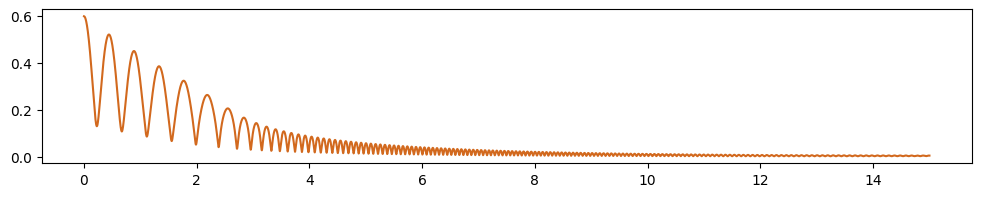

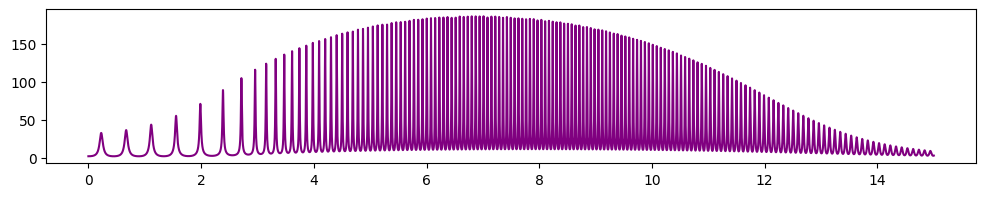

In [ ]:
#匯出數值解結果
r_the = ans.T[0]  #角度the數值解結果
r_phi = ans.T[1]  #角度phi數值解結果
r_the_d = ans.T[2] #角速度the_d數值解結果
r_phi_d = ans.T[3] #角速度phi_d數值解結果

#畫圖
plt.figure(figsize=(12,2))
plt.plot(t,r_the,color='chocolate')  #繪圖(x軸,y軸,顏色="?!")
plt.show()
plt.figure(figsize=(12,2))
plt.plot(t,r_phi_d,color='purple')  #繪圖(x軸,y軸,顏色="?!")
plt.show() #秀出圖表

In [ ]:
path=r"Numerical Solution.txt"
with open(path,'w') as f:
  f.write(str([dt,l,m,k])+"\n")
  for n in range(0,int(time/dt)-1):
    f.write(str([n*dt,r_the[n],r_phi[n],r_the_d[n],r_phi_d[n]])+"\n")
  f.close()

In [ ]:
#磁場(建表)
path=r"Magnetic Potential Energy.txt"
with open(path,'w') as f:
  for n in range(0,9000,1):
    the_n = n*math.pi/18000
    chart_vector_r = smp.Matrix([l*math.sin(the_n),k-l*math.cos(the_n)])
    chart_vector_u_p = smp.Matrix([u_p*math.sin(the_n),-u_p*math.cos(the_n)])
    chart_vector_u_b = smp.Matrix([0,u_b])
    chart_vector_B = u_0/4/math.pi*(3*chart_vector_r*(chart_vector_u_b.dot(chart_vector_r))/(chart_vector_r.norm()**5)-chart_vector_u_b/(chart_vector_r.norm())**3)
    chart_U_b = -chart_vector_u_p.dot(chart_vector_B)
    f.write(str(the_n)+"\t"+str(chart_U_b)+"\n")
  f.close()

KeyboardInterrupt: 

In [ ]:
#磁場(拉格朗日)
vector_r = smp.Matrix([l*smp.sin(the),k-l*smp.cos(the)])
vector_u_p = smp.Matrix([u_p*smp.sin(the),-u_p*smp.cos(the)])
vector_u_b = smp.Matrix([0,u_b])

vector_B=u_0/4/math.pi*(3*vector_r*(vector_u_b.dot(vector_r))/(vector_r.norm()**5)-vector_u_b/(vector_r.norm())**3)
U_b = -vector_u_p.dot(vector_B)